In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print("Shape:", df.shape)

print("\nColumns:")
print(df.columns)

print("\nInfo:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (7043, 21)

Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   In

In [3]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['Churn'].head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [4]:
churn_rate = df['Churn'].mean()*100
print("Overall Churn Rate:", round(churn_rate,2), "%")


Overall Churn Rate: 26.54 %


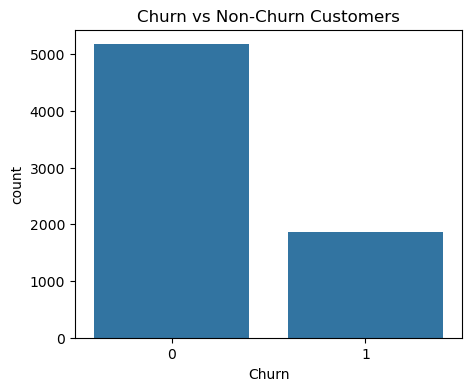

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn vs Non-Churn Customers")
plt.show()


In [6]:
contract_churn = df.groupby('Contract')['Churn'].mean()*100
print(contract_churn)


Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


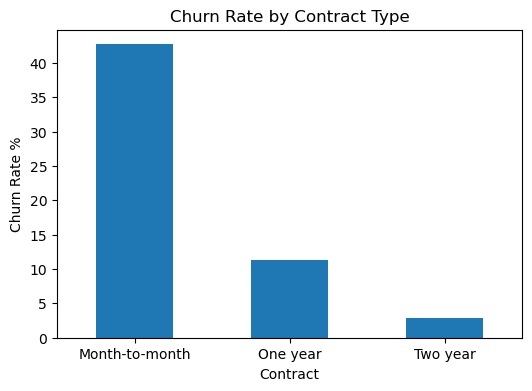

In [10]:
plt.figure(figsize=(6,4))
contract_churn.plot(kind='bar')
plt.ylabel("Churn Rate %")
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=0)
plt.figure(figsize=(6,4))
contract_churn.plot(kind='bar')
plt.ylabel("Churn Rate %")
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=0)
plt.savefig("../images/churn_contract.png", bbox_inches='tight')
plt.close()



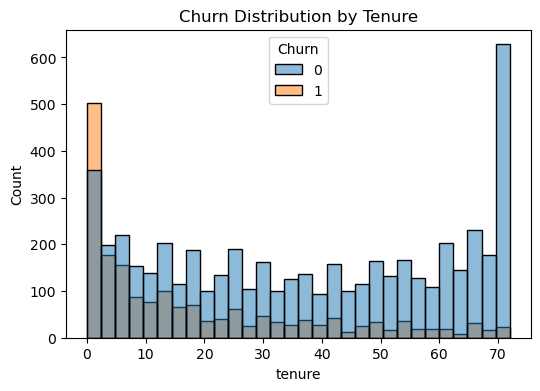

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title("Churn Distribution by Tenure")
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title("Churn Distribution by Tenure")
plt.savefig("../images/churn_tenure.png", bbox_inches='tight')
plt.close()



PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


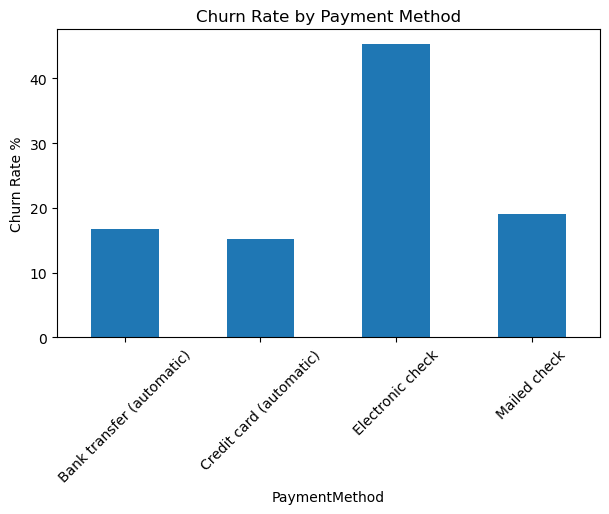

In [12]:
payment_churn = df.groupby('PaymentMethod')['Churn'].mean()*100
print(payment_churn)

plt.figure(figsize=(7,4))
payment_churn.plot(kind='bar')
plt.ylabel("Churn Rate %")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.figure(figsize=(7,4))
payment_churn.plot(kind='bar')
plt.ylabel("Churn Rate %")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.savefig("../images/churn_payment.png", bbox_inches='tight')
plt.close()



In [ ]:
## Key Insights

1. Customers with month-to-month contracts have the highest churn rate.
2. Customers with low tenure (new customers) are more likely to leave.
3. Customers using electronic check payment method churn more frequently.

## Business Recommendations

• Encourage long-term contracts with discounts
• Improve onboarding experience for new customers
• Promote automatic payment methods to reduce churn
